### 1. Load the dataset

**[1.1] Automatic reload modules**

In [1114]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**[1.2] Import packages**

In [1115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**[1.3] Load the datasets**

In [1116]:
df_train = pd.read_csv('../data/raw/train.csv', low_memory=False)
df_test = pd.read_csv('../data/raw/test.csv', low_memory=False)

### 2. Explore the data

**[2.1]] Display all columns and rows in dataframe**

In [1117]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

**[2.2] Descriptive statstics**

In [1118]:
# from summarytools import dfSummary
# dfSummary(df_train)

**[2.3] Remove unclear/ invalid attributes**

* Since definitions of "ftr" and "pfr" are unclear, the attributes will be eliminated from the analysis. 
* There is only one 'type' in the dataset. In other words, it is not useful for prediction and, therefore, will be dropped.

In [1119]:
df_train = df_train.drop(['ftr', 'pfr', 'num', 'type'], axis=1).reset_index(drop=True)
df_test = df_test.drop(['ftr', 'pfr', 'num', 'type'], axis=1).reset_index(drop=True)

**[2.4] Handle invalid values**
* 'ORB_per', 'DRB_per', 'stl_per', 'blk_per'  should be within the range of 100%

In [1120]:
df_train[['ORB_per', 'DRB_per', 'stl_per', 'blk_per']].describe().round(2)

,ORB_per,DRB_per,stl_per,blk_per
count,46618.00,46618.00,46618.00,46618.00
mean,5.65,12.58,1.73,1.88
std,9.99,11.04,2.15,6.27
min,0.00,0.00,0.00,0.00
25%,1.90,8.40,0.90,0.00
50%,4.50,11.80,1.50,0.80
75%,8.20,15.90,2.20,2.50
max,1576.60,1385.00,128.30,1072.00


**View the summary of invalid rows**

In [1121]:
to_drop=df_train[df_train[['ORB_per', 'DRB_per', 'stl_per', 'blk_per']].gt(100).any(axis=1)]
to_drop.describe().round(2)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted
count,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,94.00,6.00,21.00,35.00,35.00,35.00,35.00,15.00,17.00,35.0,35.0,0.0,0.0,87.00,87.00,87.00,87.00,87.00,87.00,87.00,87.00,88.00,87.00,87.00,88.00,88.00,88.00,88.00,88.00,88.00,88.00,94.0
mean,1.90,0.10,69.59,14.77,9.00,9.70,80.03,102.77,9.48,12.19,0.06,0.19,0.02,0.14,0.52,0.07,0.03,0.15,0.02,25.04,3.85,-0.05,65.05,2012.86,49.37,0.29,0.11,0.51,0.23,0.69,0.19,0.24,0.0,0.0,NaN,NaN,52.59,54.13,0.15,0.52,-0.99,-3.60,2.62,-4.29,1.02,-3.34,-0.95,0.37,0.57,0.95,0.08,0.02,0.08,0.31,0.0
std,2.37,0.05,93.03,11.80,25.51,25.74,176.84,168.91,29.29,28.23,0.35,0.92,0.10,0.50,1.02,0.23,0.18,0.46,0.15,124.25,19.59,0.31,94.30,2.97,23.96,0.56,0.32,0.70,0.60,0.99,0.36,0.36,0.0,0.0,NaN,NaN,161.10,158.54,0.12,0.69,83.12,33.56,66.32,49.73,0.84,36.95,21.28,0.45,0.59,0.55,0.28,0.08,0.26,0.67,0.0
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,-31.06,2009.00,21.80,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,-1330.06,-1292.02,-0.00,0.05,-88.48,-92.59,-57.46,-242.52,0.00,-141.54,-100.98,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0
25%,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.32,-6.95,2010.00,32.50,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,60.52,58.38,0.04,0.10,-26.11,-18.22,-16.91,-26.68,0.50,-21.49,-9.96,0.00,0.00,0.50,0.00,0.00,0.00,0.00,0.0
50%,1.00,0.10,8.70,19.70,0.00,0.00,0.00,108.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.11,8.55,2012.00,48.30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,NaN,NaN,68.93,72.79,0.12,0.45,-10.18,-9.79,-9.08,0.60,1.00,-2.76,0.23,0.00,0.50,1.00,0.00,0.00,0.00,0.00,0.0
75%,2.00,0.10,126.25,20.00,0.00,0.00,117.38,122.10,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.08,133.69,2016.00,58.85,0.00,0.00,1.00,0.00,1.00,0.17,0.50,0.0,0.0,NaN,NaN,109.23,111.88,0.22,0.54,4.51,11.23,-5.68,19.83,1.00,16.84,5.85,1.00,1.00,1.00,0.00,0.00,0.00,0.00,0.0
max,19.00,0.40,392.90,47.30,150.00,150.00,1576.60,1385.00,100.00,100.00,3.00,8.00,0.50,4.00,8.00,1.00,1.00,3.00,1.00,1072.00,128.30,1.06,390.60,2018.00,88.20,2.00,1.00,3.00,3.00,5.00,1.00,1.00,0.0,0.0,NaN,NaN,126.21,127.90,0.50,5.71,685.31,162.00,523.32,143.95,4.80,112.50,78.99,1.50,2.00,3.00,2.00,0.50,1.00,3.00,0.0


**Remove the invalid rows**

In [1122]:
df_train = df_train.drop(to_drop.index, axis=0).reset_index(drop=True)

In [1123]:
df_train.shape

(46524, 60)

In [1124]:
df_train[['ORB_per', 'DRB_per', 'stl_per', 'blk_per']].describe().round(2)

,ORB_per,DRB_per,stl_per,blk_per
count,46524.00,46524.00,46524.00,46524.00
mean,5.50,12.39,1.73,1.83
std,5.12,6.97,1.96,2.73
min,0.00,0.00,0.00,0.00
25%,1.90,8.40,0.90,0.00
50%,4.50,11.80,1.50,0.80
75%,8.20,15.90,2.20,2.50
max,94.30,99.80,64.80,66.60


**[2.5] Transform height to the right format**

In [1125]:
df_train.ht.value_counts()

ht
7-Jun     4607
8-Jun     4549
4-Jun     4405
5-Jun     4356
6-Jun     4266
3-Jun     4222
2-Jun     3873
9-Jun     3288
1-Jun     2977
Jun-00    2527
10-Jun    2039
11-May    1304
10-May    1193
11-Jun     897
Jul-00     538
9-May      521
-          236
8-May      207
1-Jul      165
7-May       84
2-Jul       71
6-May       32
3-Jul       30
Apr-00      20
0           19
4-Jul        8
5-May        8
6-Jul        6
5-Jul        4
4-May        4
3-May        3
Jr           2
2-May        2
1-May        2
So           1
6'4          1
Fr           1
5-Apr        1
Name: count, dtype: int64

In [1126]:
df_test.ht.value_counts()

ht
5-Jun     533
7-Jun     504
4-Jun     486
6-Jun     481
3-Jun     469
8-Jun     463
2-Jun     385
9-Jun     373
1-Jun     291
10-Jun    260
Jun-00    258
11-Jun    110
11-May     96
10-May     80
Jul-00     72
1-Jul      27
9-May      25
8-May      16
7-May       8
2-Jul       6
3-Jul       5
6-May       5
4-Jul       3
2-May       1
Name: count, dtype: int64

In [1127]:
from group_12_krml_adv_mla_2024.features.feature_engineering import convert_height

df_train['height_cm'] = df_train['ht']
convert_height(df_train, 'height_cm')
df_train['height_cm'].value_counts()

height_cm
200.66    4607
203.20    4549
193.04    4405
195.58    4356
198.12    4266
190.50    4222
187.96    3873
205.74    3288
185.42    2977
182.88    2527
208.28    2039
180.34    1304
177.80    1193
210.82     897
213.36     538
175.26     521
172.72     207
215.90     165
170.18      84
218.44      71
167.64      32
220.98      30
121.92      20
165.10       8
223.52       8
228.60       6
162.56       4
226.06       4
160.02       3
154.94       2
157.48       2
134.62       1
Name: count, dtype: int64

In [1128]:
#Apply to test set
df_test['height_cm'] = df_test['ht']
convert_height(df_test, 'height_cm')
df_test['height_cm'].value_counts()

height_cm
195.58    533
200.66    504
193.04    486
198.12    481
190.50    469
203.20    463
187.96    385
205.74    373
185.42    291
208.28    260
182.88    258
210.82    110
180.34     96
177.80     80
213.36     72
215.90     27
175.26     25
172.72     16
170.18      8
218.44      6
220.98      5
167.64      5
223.52      3
157.48      1
Name: count, dtype: int64

**Drop original ht column**

In [1129]:
df_train.drop('ht', axis=1, inplace=True)
df_test.drop('ht', axis=1, inplace=True)

**Save a copy of data before cleaning**

In [1130]:
df_train2 = df_train.copy()
df_test2 = df_test.copy()

**[2.4] Handle missing values**

In [1131]:
# #Visualize by heatmap
# plt.figure(figsize=(10,6))
# sns.heatmap(df_train2.isnull(), yticklabels=False, xticklabels=True, cbar=False, cmap='plasma')
# plt.xticks(rotation=90)
# plt.title('Missing values heatmap', size=14, color='grey')
# plt.tight_layout()
# plt.show()

In [1132]:
#Count missing values
num=df_train2.select_dtypes(include = np.number).columns
num2=df_test2.select_dtypes(include = np.number).columns

cnt = df_train2[num].isna().sum()
per = ((cnt/df_train2.shape[0])*100).round(4)

cnt2 = df_test2[num2].isna().sum()
per2 = ((cnt2/df_test2.shape[0])*100).round(4)

missing_cnt = pd.concat([per, per2], axis=1, keys=['Missing_Percent__train', 'Missing_Percent__test'])
missing_cnt.sort_values(['Missing_Percent__train', 'Missing_Percent__test'], ascending=False)

,Missing_Percent__train,Missing_Percent__test
pick,97.4056,99.0141
Rec_Rank,69.1965,71.1469
dunks_ratio,56.1517,54.6680
mid_ratio,18.2508,14.0241
rim_ratio,18.0982,12.9980
rimmade,12.2496,4.9899
rimmade_rimmiss,12.2496,4.9899
midmade,12.2496,4.9899
midmade_midmiss,12.2496,4.9899
dunksmade,12.2496,4.9899


* The missing values will be imputed with median. Regarding pick and Rec_Rank, these features would be significant predictors. They will be replaced with zero and created binary features.

**Pick and Rec_Rank - fill missing values and create encoded features**

In [1133]:
df_train2['pick'] = df_train2['pick'].fillna(0)
df_test2['pick'] = df_test2['pick'].fillna(0)

df_train2['Rec_Rank'] = df_train2['Rec_Rank'].fillna(0)
df_test2['Rec_Rank'] = df_test2['Rec_Rank'].fillna(0)


**Convert pick and recruit_rank into binary features**

In [1134]:
df_train2['Picked'] = df_train2['pick'].apply(lambda x:1 if x>0 else 0)
df_test2['Picked'] = df_test2['pick'].apply(lambda x:1 if x>0 else 0)

df_train2['Recruited'] = df_train2['Rec_Rank'].apply(lambda x:1 if x>0 else 0)
df_test2['Recruited'] = df_test2['Rec_Rank'].apply(lambda x:1 if x>0 else 0)

In [1135]:
df_test2.describe()

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,height_cm,Picked,Recruited
count,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.0,4970.000000,4433.000000,4722.000000,4722.000000,4722.000000,4722.000000,4324.000000,4273.000000,4722.000000,4722.000000,2253.000000,4970.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4969.000000,4970.000000,4969.000000,4969.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4970.000000,4957.000000,4970.000000,4970.000000
mean,15.865795,34.906881,89.500644,17.867626,43.657203,46.538342,5.168390,13.048753,10.356801,18.962254,20.459155,28.808249,0.557733,28.559155,57.394165,0.423934,11.578672,34.253320,0.228245,1.755795,1.709336,0.740874,86.986198,2021.0,15.792757,0.986900,20.114147,34.002118,9.928420,26.359170,0.557162,0.341192,2.720246,3.096569,0.856052,0.301610,102.701310,102.764251,1.411658,58.310243,-2.699018,-1.978942,-0.720076,-2.675349,16.569559,-2.149284,-0.526065,0.697025,1.953592,2.650609,1.069840,0.529118,0.260375,5.753262,195.848501,0.009859,0.288531
std,8.276655,27.921356,35.338827,6.780159,20.716630,19.992005,7.030561,9.248595,9.427192,13.255566,24.086666,32.064097,0.304797,32.348485,61.905031,0.219063,15.658638,42.533025,0.193004,3.159920,2.669430,1.328677,35.634018,0.0,28.605175,0.736819,22.605377,35.853871,12.915476,31.311422,0.203258,0.199338,5.793770,6.407538,0.236670,3.445604,9.010928,10.036087,1.065580,50.570677,7.562040,5.428728,3.921998,9.219343,10.550727,6.750792,3.920493,0.683636,1.533018,2.073589,1.153074,0.474838,0.380465,4.881835,8.724874,0.098813,0.453125
min,1.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-3.057160,-32.658900,2021.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-71.060100,-66.130100,-0.314065,0.049147,-53.994300,-45.473100,-28.868900,-91.930200,0.250000,-62.101300,-31.594500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,157.480000,0.000000,0.000000
25%,9.000000,6.700000,80.900000,14.200000,38.400000,42.340000,1.400000,8.400000,4.300000,13.100000,2.000000,3.000000,0.455000,3.000000,7.000000,0.354000,0.000000,1.000000,0.000000,0.000000,0.700000,-0.214476,77.030950,2021.0,0.000000,0.500000,3.000000,5.000000,1.000000,3.000000,0.482800,0.250000,0.000000,0.000000,0.800000,0.000000,98.608100,97.310200,0.488493,10.163500,-5.642250,-4.028530,-2.352610,-5.700980,6.891675,-4.443960,-1.868180,0.200000,0.750000,1.000000,0.250000,0.142900,0.000000,1.602175,190.500000,0.000000,0.000000
50%,17.000000,32.350000,96.800000,18.000000,48.100000,50.850000,3.700000,12.300000,8.600000,18.100000,12.000000,18.000000,0.663000,17.000000,37.000000,0.471000,4.000000,16.000000,0.273000,0.800000,1.500000,0.397186,94.163250,2021.0,0.000000,0.888889,12.000000,23.000000,5.000000,15.000000,0.572600,0.348300,0.000000,0.000000,1.000000,0.000000,102.971000,102.981000,1.218150,49.415400,-1.864300,-1.302320,-0.652638,-1.757890,16.083350,-1.540360,-0.397400,0.500000,1.666700,2.260900,0.680000,0.428600,0.133300,4.535900,195.580000,0.000000,0.000000
75%,22.000000,59.900000,107.100000,21.800000,54.000000,56.780000,7.400000,16.800000,14.500000,23.400000,31.000000,45.000000,0.769000,44.000000,89.000000,0.543000,18.000000,56.000000,0.356000,2.300000,2.200000,1.499210,10

* As some of the variables are right-skewed, the missing values will be replaced with the median.

**Fill missing values with median**

In [1136]:
for col in df_train2.select_dtypes(include=np.number).columns:
    df_train2[col] = df_train2[col].fillna(df_train2[col].median())

for col in df_test2.select_dtypes(include=np.number).columns:
    df_test2[col] = df_test2[col].fillna(df_test2[col].median())


**Check if missing values are addressed**

In [1137]:
num=df_train2.select_dtypes(include = np.number).columns
num2=df_test2.select_dtypes(include = np.number).columns

cnt = df_train2[num].isna().sum()
per = ((cnt/df_train2.shape[0])*100).round(4)

cnt2 = df_test2[num2].isna().sum()
per2 = ((cnt2/df_test2.shape[0])*100).round(4)

missing_cnt = pd.concat([per, per2], axis=1, keys=['Missing_Percent__train', 'Missing_Percent__test'])
missing_cnt.sort_values(['Missing_Percent__train', 'Missing_Percent__test'], ascending=False)
missing_cnt[missing_cnt['Missing_Percent__train']>0]

,Missing_Percent__train,Missing_Percent__test


**[2.5] Handling outliers**

**Use boxplots to detect outliers**

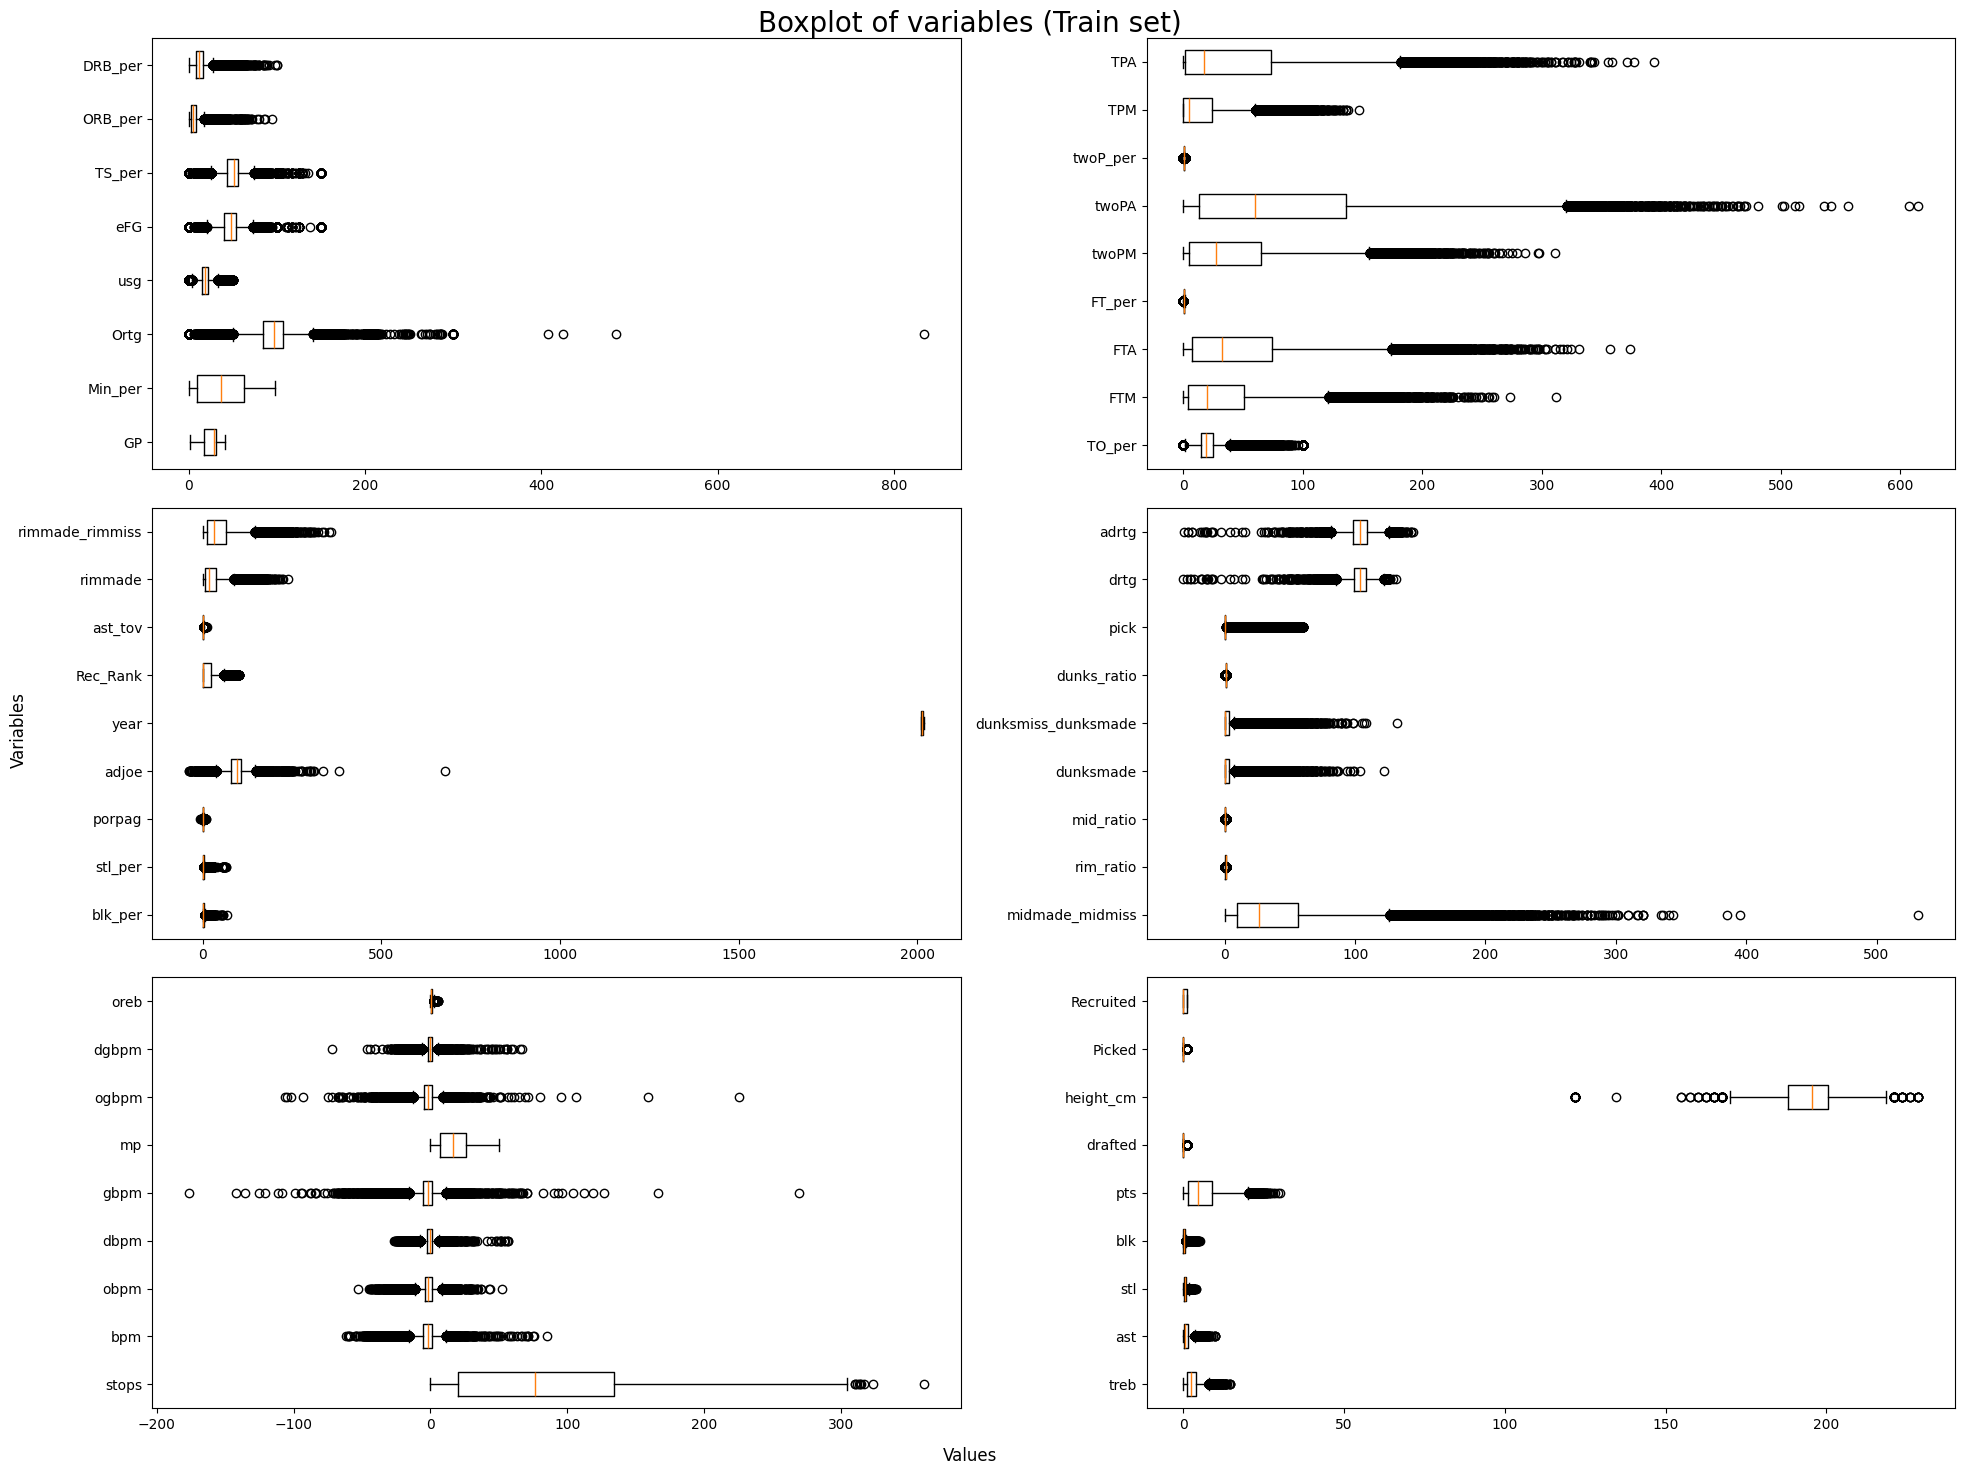

In [1138]:
#Iterate the list of variables to plot boxplots
numvar = df_train2.select_dtypes(include = np.number).columns
var_range = [(0, 8), (9, 18), (19, 28), (29, 38), (39, 48), (49, 60)]

fig, axes = plt.subplots(3, 2, figsize=(20,15))

for i, (a,b) in enumerate(var_range):
    var = numvar[a:b]
    data = [df_train2[col].dropna().values for col in var]
    ax = axes[i//2, i%2]
    ax.boxplot(data, vert=False, tick_labels=var)

fig.suptitle(f'Boxplot of variables (Train set)', size=20)
fig.supxlabel('Values')
fig.supylabel('Variables')
plt.tight_layout()
plt.show()


* Obviously, outliers are detected across multiple variables. Extreme outliers will highly distort the model performance and predictability, therefore they will be addressed by IQR method.

**Handling Outliers with IQR method**

In [1139]:
var = ['stops']

#Train set
for col in var:
    Q1 = df_train2[col].quantile(0.25)
    Q3 = df_train2[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_train2 = df_train2[(df_train2[col] >= lower_bound) & (df_train2[col] <= upper_bound)]
    
display(df_train2.describe().round(2))

#Dimension
display("Train:", df_train2.shape)
display("Test:", df_test2.shape)

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,drafted,height_cm,Picked,Recruited
count,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00,46515.00
mean,23.58,37.41,91.83,18.17,44.49,47.65,5.50,12.39,10.93,20.55,33.41,47.95,0.58,41.58,86.09,0.43,15.41,44.68,0.23,1.83,1.73,0.78,89.32,2013.53,16.39,0.91,26.58,44.80,14.02,39.71,0.57,0.32,3.31,3.71,0.94,0.86,103.46,103.61,1.43,82.62,-2.52,-1.90,-0.63,-2.55,16.98,-2.09,-0.46,0.78,1.87,2.65,1.07,0.53,0.28,5.74,0.01,194.97,0.03,0.31
std,10.04,27.99,29.96,6.16,17.94,17.11,5.12,6.97,9.35,12.15,37.29,50.14,0.27,43.77,85.49,0.19,21.49,57.58,0.19,2.73,1.96,1.34,30.39,2.87,29.01,0.67,28.15,44.34,16.86,42.66,0.17,0.15,7.46,8.17,0.17,5.92,7.68,8.89,1.06,64.95,6.83,4.98,3.37,8.03,10.62,5.96,3.18,0.74,1.46,2.09,1.17,0.47,0.42,4.94,0.10,9.13,0.16,0.46
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-6.79,-39.02,2009.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-31.80,-31.53,-0.86,0.04,-61.64,-52.57,-26.66,-176.49,0.00,-106.26,-71.53,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,121.92,0.00,0.00
25%,17.00,9.70,84.00,14.60,40.00,43.82,1.90,8.40,4.60,15.00,4.00,7.00,0.50,5.00,13.00,0.37,0.00,1.00,0.00,0.00,0.90,-0.17,79.22,2011.00,0.00,0.48,5.00,11.00,2.00,9.00,0.50,0.27,0.00,0.00,1.00,0.00,99.12,98.15,0.53,20.25,-5.39,-4.01,-2.27,-5.41,7.33,-4.46,-1.74,0.23,0.69,1.00,0.22,0.16,0.00,1.55,0.00,187.96,0.00,0.00
50%,28.00,36.00,97.00,18.10,47.60,50.74,4.50,11.80,9.10,19.30,20.00,32.00,0.66,27.00,60.00,0.46,5.00,17.00,0.27,0.80,1.50,0.39,94.51,2014.00,0.00,0.81,18.00,32.00,8.00,26.00,0.58,0.33,0.00,0.00,1.00,0.00,103.76,103.87,1.26,76.23,-1.82,-1.36,-0.57,-1.81,16.68,-1.58,-0.34,0.55,1.61,2.24,0.67,0.42,0.13,4.44,0.00,195.58,0.00,0.00
75%,31.00,62.20,106.80,21.80,53.00,55.95,8.20,15.90,15.20,24.70,51.00,74.00,0.75,65.00,136.00,0.52,24.00,73.00,0.36,2.50,2.20,1.49,106.50,2016.00,23.20,1.21,38.00,65.00,19.00,56.00,0.64,0.39,3.00,3.00,1.00,0.00,108.31,109.38,2.15,134.35,1.40,1.01,1.13,1.38,26.32,1.01,1.04,1.13,2.72,3.81,1.53,0.79,0.37,9.03,0.00,200.66,0.00,1.00
max,41.00,98.00,834.00,50.00,150.00,150.00,94.30,99.80,100.00,100.00,312.00,374.00,1.00,311.00,615.00,1.00,147.00,394.00,1.00,66.60,64.80,8.66,678.94,2018.00,100.00,12.00,238.00,358.00,222.00,532.00,1.00,1.00,122.00,132.00,1.00,60.00,131.46,144.68,5.65,304.21,85.16,52.57,56.75,269.51,50.00,225.48,66.88,5.93,10.17,14.53,10.00,4.00,5.26,29.97,1.00,228.60,1.00,1.00


'Train:'

(46515, 62)

'Test:'

(4970, 61)

### 3. Explore variables

**[3.1] Target variable**

In [1140]:
# draft_prob = df_train2.drafted.value_counts(normalize=True)
# fig, ax = plt.subplots()
# draft_prob.plot(kind='bar', ax=ax).set_title('Target proportion')
# ax.set_xlabel('Drafted')
# ax.set_ylabel('Probability')
# ax.set_xticklabels([0,1], rotation=0)
# ax.grid(False)
# plt.show()

In [1141]:
# #Games played by year
# ax=sns.histplot(df_train2['GP'][df_train2['drafted']==0], edgecolor='white', kde=True, color='skyblue')
# ax=sns.histplot(df_train2['GP'][df_train2['drafted']==1], edgecolor='white', kde=True, color='orange')
# ax.legend(['drafted 0', 'drafted 1'])
# ax.set_title('Number of games played by draft')
# plt.show()

* Players who played more games seem to have higher chances of being drafted.

In [1142]:
# ax=sns.kdeplot(df_train2['mp'][df_train2['drafted']==0], color='Skyblue', fill=True)
# ax=sns.kdeplot(df_train2['mp'][df_train2['drafted']==1], color='Orange', fill=True)
# ax.legend(['drafted 0', 'drafted 1'])
# ax.set_title('Minutes played by by draft')

* Players who played more minutes in the season tend to have higher chances of being drafted.

**Categorical variables**

**Count unique values of student's year of study**

In [1143]:
df_train2['yr'].value_counts()

yr
Jr      12387
Fr      12270
So      10958
Sr      10612
0           5
57.1        1
42.9        1
Name: count, dtype: int64

* Regarding the student's year of study ('yr'), some numeric values were found in the data, which are invalid in this categorical variable. As the proportion is relatively small, those rows will be eliminated.

**Remove invalid values existing in student's year of study**

In [1144]:
#Transform 'yr' type to string and filter the invalid values
df_train2['yr'] = df_train2['yr'].astype(str)
df_test2['yr'] = df_test2['yr'].astype(str)

#Fill missing values 
df_train2['yr'] = df_train2['yr'].replace(['nan', '0', '57.1', '42.9'], np.nan)
df_train2['yr'] = df_train2['yr'].ffill()
df_test2['yr'] = df_test2['yr'].replace(['nan', '0'], np.nan)
df_test2['yr'] = df_test2['yr'].ffill()

In [1145]:
print("Train:", df_train.shape)
print("Test:", df_test.shape)

Train: (46524, 60)
Test: (4970, 59)


**Check if the invalid values are addressed**

In [1146]:
print("Train:\n", df_train2['yr'].value_counts())
print("\nTest:\n", df_test2['yr'].value_counts())

Train:
 yr
Jr    12469
Fr    12407
So    10992
Sr    10647
Name: count, dtype: int64

Test:
 yr
Fr    1328
Jr    1318
So    1233
Sr    1091
Name: count, dtype: int64


**Drop Team, Conf, Player_id**

In [1147]:
df_train2.drop(['team', 'conf', 'player_id'], axis=1, inplace=True)
df_test2.drop(['team', 'conf', 'player_id'], axis=1, inplace=True)

### 4. Prepare Data

**[4.1] Create a copy of dataframe**

In [1148]:
df_train_cleaned = df_train2.copy()
df_test_cleaned = df_test2.copy()

**[4.2] Extract the target from dataframe**

In [1149]:
y_data = df_train_cleaned.pop('drafted')

In [1150]:
#Frequency of target variable
y_data.value_counts(normalize=True)

drafted
0.0    0.990562
1.0    0.009438
Name: proportion, dtype: float64

**[4.3] Create a list of numeric variables**

In [1151]:
var = df_train_cleaned[['Picked', 'Recruited']]
num_cols = df_train_cleaned.select_dtypes('number').columns
num_cols = [x for x in num_cols if x not in var]

var2 = df_test_cleaned[['Picked', 'Recruited']]
num_cols2 = df_test_cleaned.select_dtypes('number').columns
num_cols2 = [x for x in num_cols2 if x not in var2]

**[4.4] Import scaler and encoding**

In [1152]:
from sklearn.preprocessing import StandardScaler

**[4.65 Encoding categorical variable**

In [1153]:
features_train = pd.get_dummies(df_train_cleaned, columns=['yr'], prefix_sep='_', drop_first=True, dtype=int)
features_train = pd.get_dummies(features_train, columns=['Picked'], prefix_sep='', drop_first=True, dtype=int)
features_train = pd.get_dummies(features_train, columns=['Recruited'], prefix_sep='', drop_first=True, dtype=int)

features_test = pd.get_dummies(df_test_cleaned, columns=['yr'], prefix_sep='_', drop_first=True, dtype=int)
features_test = pd.get_dummies(features_test, columns=['Picked'], prefix_sep='', drop_first=True, dtype=int)
features_test = pd.get_dummies(features_test, columns=['Recruited'], prefix_sep='', drop_first=True, dtype=int)


In [1154]:
features_train.describe(include='all')

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,height_cm,yr_Jr,yr_So,yr_Sr,Picked1,Recruited1
count,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.00000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000
mean,23.584285,37.405564,91.825076,18.170382,44.493645,47.645788,5.502831,12.390384,10.925323,20.553538,33.406407,47.95423,0.580311,41.575986,86.085542,0.425491,15.410018,44.683478,0.225173,1.829339,1.726527,0.780556,89.320182,2013.529808,16.385600,0.914147,26.584629,44.797399,14.021434,39.711835,0.566062,0.324828,3.307578,3.707492,0.941285,0.860841,103.463648,103.610506,1.428855,82.624360,-2.523180,-1.897787,-0.625473,-2.550760,16.976197,-2.087077,-0.463764,0.778826,1.868251,2.647131,1.068329,0.528410,0.283535,5.739916,194.968467,0.268064,0.236311,0.228894,0.025820,0.307965
std,10.038720,27.993720,29.963407,6.163570,17.938627,17.113024,5.117477,6.972637,9.348170,12.152776,37.286839,50.14436,0.265512,43.773130,85.488122,0.190447,21.492335,57.579040,0.191347,2.730833,1.961999,1.340399,30.389073,2.872861,29.011235,0.666136,28.149310,44.340034,16.855928,42.662229,0.173266,0.153979,7.460885,8.174375,0.165927,5.920290,7.679970,8.894289,1.055040,64.954886,6.825149,4.983570,3.370234,8.028764,10.615576,5.955099,3.175839,0.744422,1.462055,2.093132,1.170248,0.469058,0.421685,4.938290,9.125820,0.442956,0.424820,0.420125,0.158599,0.461657
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.792410,-39.021300,2009.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-31.796000,-31.527000,-0.857238,0.043033,-61.640500,-52.569600,-26.661400,-176.493000,0.000000,-106.262000,-71.527600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,121.920000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,9.700000,84.000000,14.600000,40.000000,43.820000,1.900000,8.400000,4.600000,15.000000,4.000000,7.00000,0.500000,5.000000,13.000000,0.373000,0.000000,1.000000,0.000000,0.000000,0.900000,-0.173032,79.220850,2011.000000,0.000000,0.478322,5.000000,11.000000,2.000000,9.000000,0.500000,0.273600,0.000000,0.000000,1.000000,0.000000,99.122900,98.152000,0.526382,20.249550,-5.391775,-4.010815,-2.271365,-5.414305,7.333300,-4.455060,-1.744385,0.230800,0.685700,1.000000,0.218800,0.157900,0.000000,1.550000,187.960000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,36.000000,97.000000,18.100000,47.600000,50.740000,4.500000,11.800000,9.100000,19.300000,20.000000,32.00000,0.657000,27.000000,60.000000,0.458000,5.000000,17.000000,0.273000,0.800000,1.500000,0.391126,94.510900,2014.000000,0.000000,0.807973,18.000000,32.000000,8.000000,26.000000,0.579800,0.333300,0.000000,0.000000,1.000000,0.000000,103.757000,103.871000,1.256260,76.231100,-1.824260,-1.357340,-0.573929,-1.807390,16.677400,-1.579780,-0.335258,0.550000,1.607100,2.240000,0.666700,0.423100,0.133300,4.44

**[4.6] Scaling and fit transform numeric features**

In [1155]:
scaler = StandardScaler()

In [1156]:
#Fit transform
features_train[num_cols] = scaler.fit_transform(features_train[num_cols])
features_test[num_cols2] = scaler.transform(features_test[num_cols2])

In [1157]:
X_train = features_train
X_test = features_test

In [1158]:
X_train.describe(include='all')

,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,porpag,adjoe,year,Rec_Rank,ast_tov,rimmade,rimmade_rimmiss,midmade,midmade_midmiss,rim_ratio,mid_ratio,dunksmade,dunksmiss_dunksmade,dunks_ratio,pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,height_cm,yr_Jr,yr_So,yr_Sr,Picked1,Recruited1
count,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,4.651500e+04,46515.000000,46515.000000,46515.000000,46515.000000,46515.000000
mean,1.136502e-16,-8.798723e-17,-2.175240e-16,-3.311742e-16,-2.370767e-16,-3.213978e-16,1.295368e-16,2.150799e-16,-5.438100e-17,-1.857508e-16,2.688499e-17,-1.222045e-17,-1.008187e-16,-7.271167e-17,-2.199681e-17,-7.332269e-18,2.199681e-17,9.776359e-18,-1.160943e-16,1.283147e-17,1.050959e-16,-2.932908e-17,1.185384e-16,7.430033e-15,7.332269e-18,-1.222045e-17,-6.110225e-18,5.376998e-17,-1.344249e-17,-6.354634e-17,1.637540e-16,-1.099840e-17,-8.554314e-18,6.354634e-17,7.454474e-17,-3.330072e-17,1.686422e-15,-2.297444e-16,-6.843451e-17,-1.099840e-16,8.248803e-17,1.649761e-17,-1.955272e-17,4.582668e-17,1.099840e-16,-5.132589e-17,-2.627397e-17,-1.148722e-16,1.735304e-16,1.723083e-16,-1.283147e-16,-1.588658e-17,1.527556e-18,8.798723e-17,-7.026758e-17,0.268064,0.236311,0.228894,0.025820,0.307965
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,0.442956,0.424820,0.420125,0.158599,0.461657
min,-2.249742e+00,-1.336227e+00,-3.064607e+00,-2.948061e+00,-2.480353e+00,-2.784213e+00,-1.075313e+00,-1.777020e+00,-1.168725e+00,-1.691281e+00,-8.959399e-01,-9.563338e-01,-2.185655e+00,-9.498163e-01,-1.006999e+00,-2.234198e+00,-7.170084e-01,-7.760456e-01,-1.176788e+00,-6.698903e-01,-8.799930e-01,-5.649844e+00,-4.223323e+00,-1.576775e+00,-5.648080e-01,-1.372329e+00,-9.444251e-01,-1.010326e+00,-8.318489e-01,-9.308529e-01,-3.267036e+00,-2.109583e+00,-4.433273e-01,-4.535554e-01,-5.672956e+00,-1.454067e-01,-1.761219e+01,-1.519390e+01,-2.166855e+00,-1.271378e+00,-8.661783e+00,-1.016788e+01,-7.725342e+00,-2.166512e+01,-1.599195e+00,-1.749359e+01,-2.237664e+01,-1.046227e+00,-1.277839e+00,-1.264688e+00,-9.129182e-01,-1.126545e+00,-6.723924e-01,-1.162341e+00,-8.004679e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.558959e-01,-9.897170e-01,-2.611572e-01,-5.792780e-01,-2.505038e-01,-2.235624e-01,-7.040325e-01,-5.722981e-01,-6.766448e-01,-4.569818e-01,-7.886623e-01,-8.167353e-01,-3.024789e-01,-8.355898e-01,-8.549296e-01,-2.756255e-01,-7.170084e-01,-7.586780e-01,-1.176788e+00,-6.698903e-01,-4.212723e-01,-7.114281e-01,-3.323379e-01,-8.805977e-01,-5.648080e-01,-6.542662e-01,-7.667989e-01,-7.622403e-01,-7.131950e-01,-7.19891

### 5. Split the dataset

**Import package and split the data**

In [1159]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_data, test_size=0.2, random_state=8)

**Dimension**

In [1160]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(37212, 60)
(9303, 60)
(4970, 60)


**Target proportion**

In [1161]:
print(y_train.value_counts(normalize=True))
print(y_val.value_counts(normalize=True))

drafted
0.0    0.990621
1.0    0.009379
Name: proportion, dtype: float64
drafted
0.0    0.990326
1.0    0.009674
Name: proportion, dtype: float64


### 6. Feature Engineering

**[6.1] Correlation**

In [1162]:
features = X_train.select_dtypes(include='number')
corr_matrix = features.corr().round(2)
sign_corr_matrix = corr_matrix[(corr_matrix>=0.95) | (corr_matrix <=-0.95)]

import plotly.express as px
#Create correlation heatmap
fig = px.imshow(sign_corr_matrix, x=sign_corr_matrix.columns, y=sign_corr_matrix.columns,
                zmin=-1, zmax=1, color_continuous_scale='RdYlBu',title='Features correlation', text_auto=True)

#Update the layout
fig.update_layout(width=600, height=600)
fig.update_xaxes(tickangle=45)
fig.show()

**[6.2] Drop collinear and insignificant features**

In [1163]:
# to_drop = ['FTM', 'FTA', 'twoPM', 'twoPA', 'TPM', 'TPA', 'rimmade', 'rimmade_rimmiss',
#           'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade', 'pick', 'Rec_Rank', 'dreb', 'treb', 'Picked']

to_drop = ['FTM', 'FTA', 'twoPM', 'twoPA', 'TPM', 'TPA', 'rimmade', 'rimmade_rimmiss',
          'midmade', 'midmade_midmiss', 'dunksmade', 'dunksmiss_dunksmade', 'treb', 'dreb', 'pick', 'Rec_Rank', 'Picked1']


In [1164]:
X_train = X_train.drop(X_train[to_drop], axis=1)
X_val = X_val.drop(X_val[to_drop], axis=1)
X_test = X_test.drop(X_test[to_drop], axis=1)

X_train.columns

Index(['GP', 'Min_per', 'Ortg', 'usg', 'eFG', 'TS_per', 'ORB_per', 'DRB_per',
       'AST_per', 'TO_per', 'FT_per', 'twoP_per', 'TP_per', 'blk_per',
       'stl_per', 'porpag', 'adjoe', 'year', 'ast_tov', 'rim_ratio',
       'mid_ratio', 'dunks_ratio', 'drtg', 'adrtg', 'dporpag', 'stops', 'bpm',
       'obpm', 'dbpm', 'gbpm', 'mp', 'ogbpm', 'dgbpm', 'oreb', 'ast', 'stl',
       'blk', 'pts', 'height_cm', 'yr_Jr', 'yr_So', 'yr_Sr', 'Recruited1'],
      dtype='object')

In [1165]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(37212, 43)
(9303, 43)
(4970, 43)


### 7. Train XGBoost Model - Hyperparameter Tuning with RandomSearchCV

**[7.1] Instantiate and fit the model**

In [1166]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=8)

**[7.2] Parameters dictionary**

In [1272]:
from scipy.stats import randint

param_ran = {
    'gamma': randint(0, 5),
    'max_depth': randint(0, 10),
    'scale_pos_weight': randint(1, 150),
    'max_delta_step': randint(0, 15),
    'max_leaves': randint(0, 10),
    'n_estimators': randint(1, 100),
    'min_child_weight': randint(0, 20)
}

**[7.3] Instantiate and fit the hyperparameters wit Stratified KFold**

In [1273]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=8)
ransearch = RandomizedSearchCV(xg, param_ran, cv=skf, random_state=8)

In [1274]:
ransearch.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=8, shuffle=True),
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importanc...
                                        'max_leaves': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB2B4BFF10>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB2E614B10>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB2E6165D0>,
                                        'scale_pos_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001AB1E7CA450>},
                   random_state=8)

**[7.4] Display the best set of parameters**

In [1275]:
ransearch.best_params_

{'gamma': 2,
 'max_delta_step': 2,
 'max_depth': 6,
 'max_leaves': 9,
 'min_child_weight': 5,
 'n_estimators': 82,
 'scale_pos_weight': 108}

**[7.5] Evaluation metrics for hyperparameters**

In [1276]:
ransearch.best_score_

np.float64(0.9821832670208842)

In [1277]:
print("RanCV_Train:", f'{ransearch.score(X_train, y_train):.4f}')
print("RanCV_val:", f'{ransearch.score(X_val, y_val):.4f}')

RanCV_Train: 0.9850
RanCV_val: 0.9803


**[7.6] Make prediction on training data**

In [1278]:
y_train_pred = ransearch.best_estimator_.predict_proba(X_train)[:, 1]
y_val_pred = ransearch.best_estimator_.predict_proba(X_val)[:, 1]

**[7.7] Performance metric - AUROC**

In [1279]:
from sklearn.metrics import roc_auc_score, roc_curve, auc

In [1280]:
print("Train - AUROC:\n", f'{roc_auc_score(y_train, y_train_pred):.4f}')
print("Val - AUROC:\n", f'{roc_auc_score(y_val, y_val_pred):.4f}')

Train - AUROC:
 0.9994
Val - AUROC:
 0.9818


**Plot the AUROC curve**

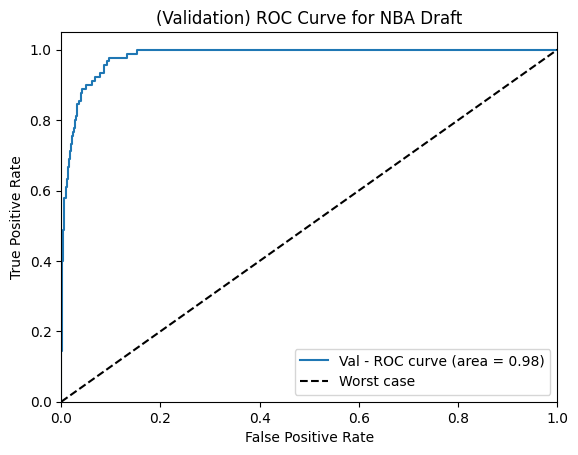

In [1281]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred) 
roc_auc = auc(fpr, tpr)
plt.figure()  
plt.plot(fpr, tpr, label='Val - ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='Worst case')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(Validation) ROC Curve for NBA Draft')
plt.legend()
plt.show()

**[7.8] Predict on test data**

In [1282]:
y_test_pred = ransearch.best_estimator_.predict_proba(X_test)[:, 1]

#Dataframe for pred result
y_pred = pd.read_csv('../data/interim/y_test.csv')
y_pred.loc[:, 'drafted'] = y_test_pred

print(y_pred.describe().round(5))

y_pred = pd.DataFrame(y_pred)

#Save the result to CSV file
y_pred.to_csv('../data/external/at1_pred_week3.13.csv', index=False)

          drafted
count  4970.00000
mean      0.01973
std       0.11062
min       0.00000
25%       0.00000
50%       0.00001
75%       0.00008
max       0.99893


### 8. Feature Importance

In [1283]:
feature = ransearch.best_estimator_.feature_importances_

In [1284]:
#Dataframe of feature importance
feat_imp_rf_df = pd.DataFrame(
    {'feature': X_train.columns,
     'feature_importance': feature})

In [1285]:
#Sort the dataframe
feat_imp_rf_df = feat_imp_rf_df.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf_df

,feature,feature_importance
0,gbpm,0.240304
1,porpag,0.212304
2,dporpag,0.176160
3,Recruited1,0.061148
4,adjoe,0.022950
5,adrtg,0.022306
6,stops,0.019906
7,GP,0.018482
8,pts,0.016515
9,blk_per,0.014433


In [1286]:
#Visualize the feature importance
import altair as alt

alt.Chart(feat_imp_rf_df).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance']
)

alt.Chart(...)

* Handled outliers with diff variables from xgb experiment 5
* Include height
* Drop the rows with invalid per
* Feature eng
* Diff hyperpara tuning